In [1]:
import requests
import openpyxl
import pandas as pd
import numpy as np
import mysql.connector
import matplotlib.pyplot as plt
from mysql.connector import Error
from sqlalchemy import create_engine

In [2]:
from sqlalchemy import create_engine

def connect_to_mysql_sqlalchemy(user, password, host='localhost', database=None):
    try:
        if not database:
            raise ValueError("Database name must be provided")

        connection_string = f"mysql+mysqlconnector://{user}:{password}@{host}/{database}"
        engine = create_engine(connection_string)

        with engine.connect() as conn:
            print("Connected to MySQL via\ SQLAlchemy successfully")
        return engine

    except Exception as e:
        print("Failed to connect:", e)
        return None

<>:12: SyntaxWarning: invalid escape sequence '\ '
<>:12: SyntaxWarning: invalid escape sequence '\ '
C:\Users\andre\AppData\Local\Temp\ipykernel_30272\4172897674.py:12: SyntaxWarning: invalid escape sequence '\ '
  print("Connected to MySQL via\ SQLAlchemy successfully")


In [3]:
engine = connect_to_mysql_sqlalchemy('root', 'Poloniasi28~', database='job application')

Connected to MySQL via\ SQLAlchemy successfully


In [4]:
def data_preview(df):
    print("Data Preview:")
    print(df.head())
    print("\nData Description:")
    print(df.describe())
    print("\nData Info:")
    print(df.info())
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nData Types:")
    print(df.dtypes)
    print("\nUnique Values in Each Column:")
    for col in df.columns:
        print(f"{col}: {df[col].nunique()} unique values")


In [5]:
df = pd.read_excel("C:/Resumes & Cover Letters/Job Applications.xlsx", sheet_name="Sheet1")

In [6]:
data_preview(df)

Data Preview:
  Date Applied     Industry                             Company      Level  \
0   2024-04-09   Technology                             Trideca      Entry   
1   2024-06-18  Recruitment                   Alzaro Consulting  Mid-Level   
2   2024-06-18  Recruitment  Professional Recruitment Australia  Mid-Level   
3   2024-06-25      Finance   McMillan Shakespeare Group (MMSG)  Mid-Level   
4   2024-07-03  Recruitment                                 IAG  Mid-Level   

       Role/Position            Location Application Source   Job Type  \
0       Data Analyst      Melbourne, VIC             Indeed  Full-Time   
1       Data Analyst  Hawthorn East, VIC               Seek  Full-Time   
2       Data Analyst      Melbourne, VIC             Indeed  Full-Time   
3       Data Analyst      Melbourne, VIC             Indeed  Full-Time   
4  Reporting Analyst      Melbourne, VIC               Seek  Full-Time   

    Outcome  Interview Date  Skills  Notes  
0  Rejected             NaN

In [7]:
def clean_data(df):
    df = df.drop_duplicates()
    
    first_col = df.columns[0]
    if df[first_col].dtype == 'object':
        df[first_col] = pd.to_datetime(df[first_col], errors='coerce', dayfirst=True)

    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].str.strip()

    return df

In [8]:
clean_data(df)

,Date Applied,Industry,Company,Level,Role/Position,Location,Application Source,Job Type,Outcome,Interview Date,Skills,Notes
0,2024-04-09,Technology,Trideca,Entry,Data Analyst,"Melbourne, VIC",Indeed,Full-Time,Rejected,NaN,NaN,NaN
1,2024-06-18,Recruitment,Alzaro Consulting,Mid-Level,Data Analyst,"Hawthorn East, VIC",Seek,Full-Time,Pending,NaN,NaN,NaN
2,2024-06-18,Recruitment,Professional Recruitment Australia,Mid-Level,Data Analyst,"Melbourne, VIC",Indeed,Full-Time,Pending,NaN,NaN,NaN
3,2024-06-25,Finance,McMillan Shakespeare Group (MMSG),Mid-Level,Data Analyst,"Melbourne, VIC",Indeed,Full-Time,Rejected,NaN,NaN,NaN
4,2024-07-03,Recruitment,IAG,Mid-Level,Reporting Analyst,"Melbourne, VIC",Seek,Full-Time,Pending,NaN,NaN,NaN
5,2024-07-04,Technology,MYOB,Mid-Level,Data Analyst,"Melbourne, VIC",Indeed,Full-Time,Rejected,NaN,NaN,NaN
6,2024-07-05,Real Estate,Equiem,Mid-Level,Data Analyst,"Melbourne, VIC",Seek,Full-Time,Pending,NaN,NaN,NaN
7,2024-07-08,Technology,Velrada,Entry,Business Analyst,"Melbourne, VIC",Referral,Full-Time,Rejected,NaN,NaN,NaN
8,2024-07-09,Transportation,Transurban,Entry,Reporting Analyst,"Melbourne, VIC",Indeed,Full-Time,Rejected,NaN,NaN,NaN
9,2024-07-15,Recruitment,Bluefin Resources Pty Limited,Mid-Level,Data Analyst,"Melbourne, VIC",Seek,Full-Time,Rejected,NaN,NaN,NaN


In [9]:
print(df.dtypes)

Date Applied          datetime64[ns]
Industry                      object
Company                       object
Level                         object
Role/Position                 object
Location                      object
Application Source            object
Job Type                      object
Outcome                       object
Interview Date               float64
Skills                       float64
Notes                        float64
dtype: object


In [10]:
df_filtered = df.iloc[:, :-3]

In [11]:
df_filtered.to_sql(name = "job applications", con = engine, if_exists = "replace", index = False)

51

In [12]:
query = "SELECT Industry, COUNT(*) as count FROM `job applications` GROUP BY Industry"
df_industry = pd.read_sql(query, engine)
df_industry = df_industry.sort_values(by='count', ascending=False)
print(df_industry)

          Industry  count
1      Recruitment     16
2          Finance     11
0       Technology      7
3      Real Estate      3
5       Investment      3
7        Marketing      3
6           Health      2
8              NFP      2
4   Transportation      1
9           Retail      1
10   Manufacturing      1
11         Utility      1


In [13]:
query = """
SELECT Industry, COUNT(*) as offers
FROM `job applications`
WHERE `Outcome` = 'Accepted'
GROUP BY Industry
"""

In [14]:
df_offers = pd.read_sql(query, engine)
print(df_offers)
df_industry = df_industry.merge(df_offers, on='Industry', how='left')

      Industry  offers
0      Finance       1
1  Recruitment       1
2          NFP       1


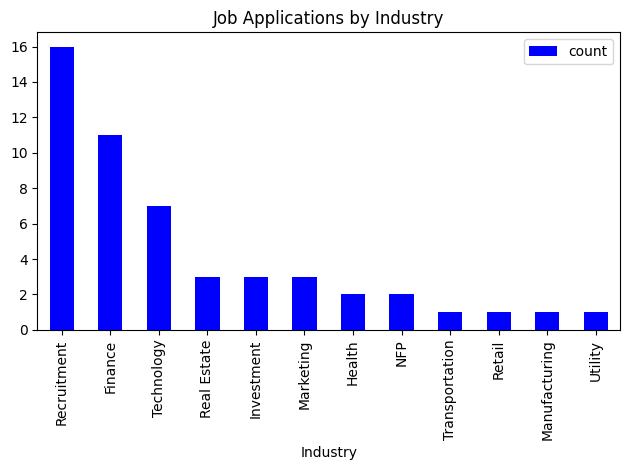

In [15]:
df_industry.plot(kind='bar', x='Industry', y='count', title='Job Applications by Industry',
                 legend=True, color='blue')
plt.tight_layout()
plt.show()

In [16]:
print(df_industry)

          Industry  count  offers
0      Recruitment     16     1.0
1          Finance     11     1.0
2       Technology      7     NaN
3      Real Estate      3     NaN
4       Investment      3     NaN
5        Marketing      3     NaN
6           Health      2     NaN
7              NFP      2     1.0
8   Transportation      1     NaN
9           Retail      1     NaN
10   Manufacturing      1     NaN
11         Utility      1     NaN


In [17]:
query = """
SELECT Level, Industry
FROM `job applications`
WHERE Outcome = 'Pending'
GROUP BY Level, Industry
"""

df_pending = pd.read_sql(query, engine)
df_pending = df_pending.groupby(['Level', 'Industry']).size().reset_index(name='count')
print(df_pending)

        Level       Industry  count
0       Entry        Finance      1
1       Entry         Health      1
2       Entry     Investment      1
3       Entry  Manufacturing      1
4       Entry    Recruitment      1
5      Intern    Recruitment      1
6   Mid-Level        Finance      1
7   Mid-Level         Health      1
8   Mid-Level      Marketing      1
9   Mid-Level    Real Estate      1
10  Mid-Level    Recruitment      1
11  Mid-Level     Technology      1
12  Mid-Level        Utility      1


Level        Entry  Intern  Mid-Level
Industry                             
Finance        2.0     0.0        1.0
Health         1.0     0.0        1.0
Investment     1.0     0.0        0.0
Marketing      0.0     0.0        2.0
Recruitment    3.0     1.0        5.0
Technology     0.0     0.0        1.0


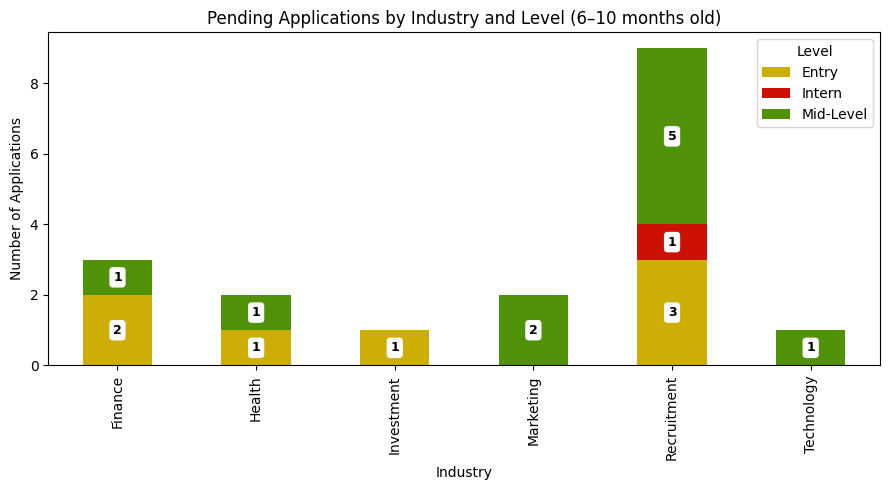

In [24]:
query = """
SELECT Industry, Level, `Role/Position`, Outcome, `Date Applied`
FROM `job applications`
WHERE Outcome = 'PENDING' 
AND `Date Applied` <= DATE_SUB(CURDATE(), INTERVAL 6 MONTH)
AND `Date Applied` >= DATE_SUB(CURDATE(), INTERVAL 10 MONTH); 
"""

color_map = {
    'Intern': "#CC1004",
    'Entry': "#CCAE04",
    'Mid-Level': "#4F9207",
}

df_pending_old = pd.read_sql(query, engine)
df_pending_old = df_pending_old.groupby(['Industry', 'Level']).size().reset_index(name='count')
df_pending_old_pivot = df_pending_old.pivot(index='Industry', columns='Level', values='count').fillna(0)
df_pending_old = df_pending_old.sort_values(by='count', ascending=False)
print(df_pending_old_pivot)

ax = df_pending_old_pivot.plot(
    kind='bar',
    stacked=True,
    title='Pending Applications by Industry and Level (6–10 months old)',
    color=[color_map[level] for level in df_pending_old_pivot.columns],
    figsize=(9, 5)
)

# Loop over each bar group (Industry)
for i, industry in enumerate(df_pending_old_pivot.index):
    y_offset = 0  # track cumulative height for stacking
    for level in df_pending_old_pivot.columns:
        value = df_pending_old_pivot.loc[industry, level]
        if value > 0:
            ax.text(
                i,                         # x position (bar group)
                y_offset + value / 2,      # y position: middle of the current bar segment
                int(value),                # label text
                ha='center', va='center',
                fontsize=9, color='black', fontweight='bold', family='sans-serif',
                bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3')
            )
            y_offset += value  # add this segment's height for the next one

plt.ylabel('Number of Applications')
plt.xlabel('Industry')
plt.legend(title='Level')
plt.tight_layout()
plt.show()

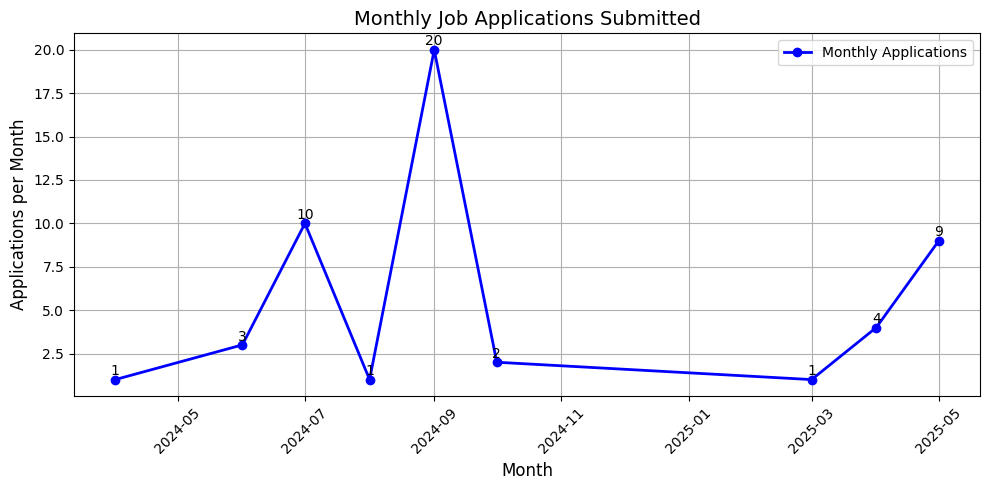

In [47]:
query = """
SELECT `Date Applied`, COUNT(*) as count
FROM `job applications`
GROUP BY `Date Applied`
"""

df_test = pd.read_sql(query, engine)
df_test['Date_Applied'] = pd.to_datetime(df_test['Date Applied'], errors='coerce')
df_test.drop(columns=['Date Applied'], inplace=True)
df_test.rename(columns={'count': 'Number of Applications', 'Date_Applied': 'Date'}, inplace=True)

# Sort by date
df_test.sort_values(by='Date', ascending=True, inplace=True)

# Group by Month
df_test['Month'] = df_test['Date'].dt.to_period('M').dt.to_timestamp()
df_monthly = df_test.groupby('Month', as_index=False)['Number of Applications'].sum()

plt.figure(figsize=(10, 5))
plt.plot(df_monthly['Month'], df_monthly['Number of Applications'],
         marker='o', color='blue', linewidth=2, linestyle='-', label='Monthly Applications')

# Add improved value labels
for x, y in zip(df_monthly['Month'], df_monthly['Number of Applications']):
    plt.text(x, y + 0.25,  # raise labels higher
             str(y),
             ha='center',
             fontsize=10,     # increase font size
             fontweight='light',  # make it lighter
             color='black')

# Title and labels
plt.title('Monthly Job Applications Submitted', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Applications per Month', fontsize=12)

# Ticks and grid
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

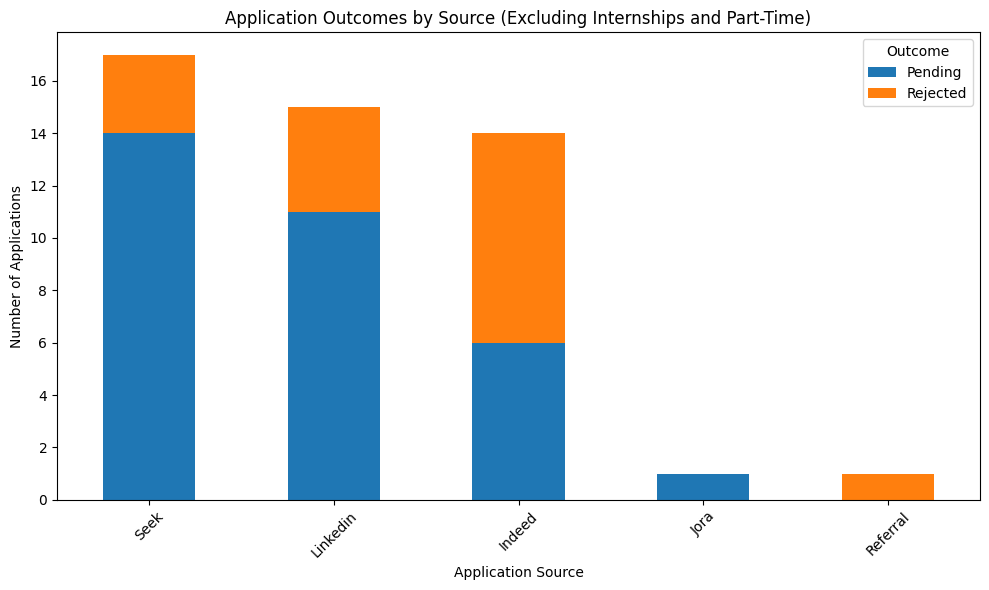

In [54]:
query = """
SELECT `Application Source`, Outcome, COUNT(*) as count
FROM `job applications`
WHERE `Job Type` != "Internship" AND `Job Type` != "Part-Time"
GROUP BY `Application Source`, Outcome
ORDER BY count DESC
"""

df_application_source = pd.read_sql(query, engine)
df_application_source = df_application_source.pivot(index='Application Source', columns='Outcome', values='count').fillna(0)

# Optional: sort by total or a specific outcome
df_application_source['Total'] = df_application_source.sum(axis=1)
df_application_source = df_application_source.sort_values(by='Total', ascending=False).drop(columns='Total')

# Plot stacked bar chart
ax = df_application_source.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    title='Application Outcomes by Source (Excluding Internships and Part-Time)'
)

plt.xlabel('Application Source')
plt.ylabel('Number of Applications')
plt.legend(title='Outcome')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

''